# Imports

In [166]:
from __future__ import absolute_import
from __future__ import print_function
import pandas as pd
import csv
import sys
import os

import numpy as np
import shutil
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

mimic_path = r"Z:\mimic-iii-clinical-database-1.4"
data_path = r"C:\Users\URHU\Documents\data_temp"
path_csv = r"C:\Users\URHU\Documents\delirium_data"

# loading

In [167]:
all_data_deli = pd.read_csv(os.path.join(path_csv, 'all_data_delirium_mimic.csv'))
display(all_data_deli.head())

,ALT,ART BP Diastolic,ART BP Systolic,ART BP mean,AST,Alkaline Phosphate,BUN,Bicarbonate,CAM-ICU MS Change,Chloride,Creatinine,Delirium assessment,FiO2,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Glucose,Heart Rate,Height,Hemoglobin,Lactate,NBP Mean,NBP [Diastolic],NBP [Systolic],Oxygen Saturation,PaCO2,PaO2,Platelets,Potassium,Respiratory Rate,Sedation Score,Sodium,Temperature F,WBC,Weight,pH,ICUSTAY_ID,Morphine,Propofol,Midazolam,Fentanyl,Cortisol,CAM-ICU Altered LOC,CAM-ICU Inattention,Osmolality,Lorazepam,direct bilirubin,Dexmedetomidine,CAM-ICU Disorganized thinking,CAM-ICU MS change,TSH,Temperature C,CAM-ICU RASS LOC,CI,Carboxyhemoglobin,ICP,Ammonia,Methemoglobin,GENDER,AGE,LOS,DIAGNOSIS,ETHNICITY,PATIENTWEIGHT,HOURS,MINUTES,BIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,5.0,NaN,113.0,NaN,NaN,1.4,76.0,65.0,110.0,97.0,43.0,79.0,NaN,4.6,20.0,NaN,NaN,99.1,NaN,60.39,7.41,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,0.896667,53.8,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,79.0,68.0,113.0,98.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,1.896667,113.8,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,110.0,NaN,NaN,NaN,79.0,68.0,116.0,98.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,2.896667,173.8,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,71.0,61.0,102.0,96.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,99.8,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,3.896667,233.8,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,5.0,NaN,108.0,NaN,NaN,NaN,69.0,58.0,103.0,94.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,4.913333,294.8,4


In [168]:
all_data_deli['GENDER'].value_counts()

GENDER
2    351182
1    272253
Name: count, dtype: int64

In [169]:
# Replace 'CAM-ICU MS change' with 'CAM-ICU MS Change' in all_data_deli
all_data_deli.loc[all_data_deli['CAM-ICU MS change'].notnull(),'CAM-ICU MS Change'] = all_data_deli['CAM-ICU MS change']

In [170]:
col_order = ['ICUSTAY_ID','BIN','HOURS','AGE', 'GENDER', 'Height','Weight','PATIENTWEIGHT',
             'Oxygen Saturation', 'Heart Rate','Temperature C', 'Temperature F','WBC',
             'Sodium','BUN','Glucose','direct bilirubin','Hemoglobin','Platelets',
             'Potassium','Chloride','Bicarbonate','Creatinine','ALT','AST','Alkaline Phosphate',
             'Delirium assessment','CAM-ICU MS Change','CAM-ICU Inattention','CAM-ICU Altered LOC',
             'CAM-ICU Disorganized thinking', 
             'CAM-ICU RASS LOC']
            

In [171]:
#print all columns name in all_data_deli
all_data_deli = all_data_deli[col_order]

In [172]:
all_data_deli.head(1)

,ICUSTAY_ID,BIN,HOURS,AGE,GENDER,Height,Weight,PATIENTWEIGHT,Oxygen Saturation,Heart Rate,Temperature C,Temperature F,WBC,Sodium,BUN,Glucose,direct bilirubin,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,ALT,AST,Alkaline Phosphate,Delirium assessment,CAM-ICU MS Change,CAM-ICU Inattention,CAM-ICU Altered LOC,CAM-ICU Disorganized thinking,CAM-ICU RASS LOC
0,200001,0,0.896667,61,1,NaN,60.39,NaN,97.0,113.0,NaN,99.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
all_data_deli.groupby(['ICUSTAY_ID']).head(1).shape

(7292, 32)

# CAM Positive selection

In [174]:
#Positive CAM-ICU
feature1_pos = all_data_deli['CAM-ICU MS Change']==1
feature2_pos = (all_data_deli['CAM-ICU Inattention']==1) | (all_data_deli['CAM-ICU Inattention']==4)
feature3_pos = all_data_deli['CAM-ICU Altered LOC']==1
feature4_pos = all_data_deli['CAM-ICU Disorganized thinking']==1

cam_pos = all_data_deli[(feature1_pos&feature2_pos)&(feature3_pos|feature4_pos)]
#cam_pos contanins all positive CAM-ICU

In [175]:
feature1_pos.sum(),feature2_pos.sum(),feature3_pos.sum(),feature4_pos.sum()

(np.int64(9537), np.int64(6341), np.int64(4738), np.int64(766))

In [176]:
#Statistics of dataset
print("ICU Stays with CAM positive {0}" .format(cam_pos.ICUSTAY_ID.nunique()))
print("Unique ICU Stays {0} \n" .format(all_data_deli.ICUSTAY_ID.nunique()))

print("No. of records with CAM positive {0}" .format(cam_pos.shape[0]))
print("Total No. of records {0}" .format(all_data_deli.shape[0]))

ICU Stays with CAM positive 1339
Unique ICU Stays 7292 

No. of records with CAM positive 5303
Total No. of records 623435


In [177]:
pos_id = cam_pos.ICUSTAY_ID.unique()
cam_pos_df = all_data_deli[all_data_deli['ICUSTAY_ID'].isin(pos_id)]
all_data_deli['CAM'] = np.nan

((feature1_pos&feature2_pos)&(feature3_pos|feature4_pos)).sum()

np.int64(5303)

In [178]:
all_data_deli.loc[((feature1_pos & feature2_pos) & (feature3_pos | feature4_pos)), 'CAM'] = 1
all_data_deli['CAM'] = all_data_deli['CAM'].fillna(0)
all_data_deli['CAM'].value_counts()


CAM
0.0    618132
1.0      5303
Name: count, dtype: int64

In [179]:
all_data_deli.columns

Index(['ICUSTAY_ID', 'BIN', 'HOURS', 'AGE', 'GENDER', 'Height', 'Weight',
       'PATIENTWEIGHT', 'Oxygen Saturation', 'Heart Rate', 'Temperature C',
       'Temperature F', 'WBC', 'Sodium', 'BUN', 'Glucose', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'Delirium assessment',
       'CAM-ICU MS Change', 'CAM-ICU Inattention', 'CAM-ICU Altered LOC',
       'CAM-ICU Disorganized thinking', 'CAM-ICU RASS LOC', 'CAM'],
      dtype='object')

## Temperature

In [180]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [181]:
all_data_deli["Temperature F"].describe()

count    158115.000000
mean         98.436112
std          13.144232
min           0.000000
25%          97.700000
50%          98.400000
75%          99.200000
max        4867.350000
Name: Temperature F, dtype: float64

In [182]:
all_data_deli["Temperature F"] = fahr_to_celsius(all_data_deli["Temperature F"])

In [183]:
all_data_deli["Temperature F"].describe()

count    158115.000000
mean         36.908951
std           7.302351
min         -17.777778
25%          36.500000
50%          36.888889
75%          37.333333
max        2686.305556
Name: Temperature F, dtype: float64

In [184]:
#  this line makes sure that the Temperature C column is filled with the values from Temperature F
all_data_deli.loc[all_data_deli['Temperature F'].notnull(),'Temperature C'] = all_data_deli['Temperature F']

In [185]:
all_data_deli[['Temperature F','Temperature C']].describe()

,Temperature F,Temperature C
count,158115.000000,176614.000000
mean,36.908951,36.943143
std,7.302351,7.010231
min,-17.777778,-17.777778
25%,36.500000,36.500000
50%,36.888889,36.888889
75%,37.333333,37.333333
max,2686.305556,2686.305556


## Weight

In [186]:
all_data_deli.loc[all_data_deli['Weight'].notnull(),'PATIENTWEIGHT'] = all_data_deli['Weight']

In [187]:
all_data_deli[['PATIENTWEIGHT','Weight']].describe()

,PATIENTWEIGHT,Weight
count,497586.000000,15775.000000
mean,82.739986,81.433748
std,27.269191,24.975699
min,0.000000,0.000000
25%,66.400000,65.745000
50%,78.800000,78.000000
75%,95.000000,93.194167
max,710.400000,710.400000


## BIN (time)

In [188]:
all_data_deli.BIN.describe()

count    623435.00000
mean        117.61482
std         167.16792
min         -23.00000
25%          22.00000
50%          57.00000
75%         146.00000
max        2082.00000
Name: BIN, dtype: float64

In [189]:
all_data_deli[all_data_deli.BIN < 0].shape

(2940, 33)

## renaming col

In [190]:
data_copy  = all_data_deli.copy()
data_copy.rename(columns={"ICUSTAY_ID": "patientunitstayid", "BIN": "itemoffset",
                          "GENDER": "gender","AGE": "age","Height": "admissionheight","PATIENTWEIGHT": "admissionweight",
                         "Heart Rate": "Heart Rate","Oxygen Saturation": "O2 Saturation","Glucose": "glucose","Temperature C": "Temperature (C)",
                         "Sodium": "sodium","BUN": "BUN","WBC": "WBC x 1000",
                         "Bilirubin": "direct bilirubin"},inplace=True)

In [191]:
def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x

def check_itemvalue(df):
    for c in df.columns:
        df[c] = df[c].apply(lambda x: check(x))
    return df

# labelling

In [192]:
data_copy.columns

Index(['patientunitstayid', 'itemoffset', 'HOURS', 'age', 'gender',
       'admissionheight', 'Weight', 'admissionweight', 'O2 Saturation',
       'Heart Rate', 'Temperature (C)', 'Temperature F', 'WBC x 1000',
       'sodium', 'BUN', 'glucose', 'direct bilirubin', 'Hemoglobin',
       'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'ALT', 'AST', 'Alkaline Phosphate', 'Delirium assessment',
       'CAM-ICU MS Change', 'CAM-ICU Inattention', 'CAM-ICU Altered LOC',
       'CAM-ICU Disorganized thinking', 'CAM-ICU RASS LOC', 'CAM'],
      dtype='object')

In [193]:
data_copy = data_copy[data_copy['itemoffset'] > -7]
label_deli = data_copy.copy()
label_deli['labelrec'] = np.nan
label_deli.loc[label_deli['CAM']==1,'labelrec']=1
label_deli.loc[label_deli['CAM']==0,'labelrec']=0
label_deli['labelpt'] = np.nan
pos_cam_coh = label_deli[label_deli['labelrec']==1]['patientunitstayid'].unique()
label_deli.loc[label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt']=1
label_deli.loc[~(label_deli['patientunitstayid'].isin(pos_cam_coh)), 'labelpt']=0

In [194]:
order_columns = ['patientunitstayid','itemoffset', 
       'gender', 'age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose', 'Temperature (C)',
       'sodium','BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin','Platelets','Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'ALT', 'AST', 'Alkaline Phosphate','CAM', 'labelrec', 'labelpt']

In [195]:
print(label_deli.groupby('patientunitstayid').count().shape)
data_copy = label_deli[order_columns]
new_df = data_copy
print(new_df.shape)
#the new_df has many more rows because it contains all the records for each patient unit stay

(7292, 34)
(621100, 26)


# checkpoint

In [196]:
checkpoint = new_df.copy()
#save checkpoint in data_path
checkpoint.to_csv(os.path.join(data_path, 'checkpoint_1.csv'), index=False)
#load
checkpoint = pd.read_csv(os.path.join(data_path, 'checkpoint_1.csv'))

# add variables

## Add Sofa score to dataframe

In [52]:
# data_copy = label_deli[order_columns]
# df_mimic = data_copy.copy()
# sofa = pd.read_csv(os.path.join(data_processed_path, 'mimic_pivoted_sofa.csv'))
# df_mimic['day'] = np.nan
# for i in range(-7,1000):
#     df_mimic.loc[((df_mimic['itemoffset'] <= i*24) & (df_mimic['itemoffset'] >= (i-1)*24)),'day'] = i  
# sofa.rename(columns={'icustay_id':'patientunitstayid'},inplace=True)
# set_sofa = set(sofa.patientunitstayid.unique())
# set_mimic = set(df_mimic.patientunitstayid.unique())
# inters = list(set_sofa.intersection(set_mimic))
# print(len(inters))
# new_df = pd.merge(df_mimic, sofa, how='left', left_on=['patientunitstayid','day'],right_on=['patientunitstayid','day'])

In [53]:
# new_df.columns

## Add WES variables to dataframe

In [54]:
# data_copy = new_df
# df_mimic = data_copy.copy()
# df_vent = pd.read_csv(os.path.join(data_processed_path, 'mimic_wes.csv'))
# df_vent.rename(columns={'icustay_id':'patientunitstayid'},inplace=True)
# # new_df = pd.merge(df_mimic, df_vent, how='left',left_on=['patientunitstayid','itemoffset'],right_on=['patientunitstayid','hr'])

In [55]:
# new_df.columns

In [56]:
# columns_order =['patientunitstayid', 'itemoffset', 'gender', 'age', 'admissionheight',
#        'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
#        'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
#        'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
#        'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 
#        'sofa', 'sofa_wo_gcs', 'vent_flag','rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine',
#        # 'rate_phenylephrine', 'fluidin', 'fluidout',
#        'CAM']

In [57]:
# new_df = new_df[columns_order]

# imputation

## Imputation patient wise for weight and height

In [197]:
for i in ['admissionheight', 'admissionweight']:
    new_df.loc[:, i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.ffill())
    new_df.loc[:, i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.bfill())

# Missing values

## record-wise

In [59]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = order_columns 
percent_missing = new_df[columns].isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

,column_name,percent_missing
0,patientunitstayid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,labelrec,0.000000
5,labelpt,0.000000
6,CAM,0.000000
7,admissionweight,0.300757
8,Heart Rate,2.242634
9,O2 Saturation,4.466914


## Patient-wise

In [61]:
columns_order = columns #modifiy if find data

In [62]:
df_g = new_df[columns_order].drop('patientunitstayid', axis=1).groupby(new_df['patientunitstayid']).apply(lambda x: x.notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0: np.nan})

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df


,column_name,percent_missing
0,itemoffset,0.000000
1,gender,0.000000
2,age,0.000000
3,CAM,0.000000
4,labelrec,0.000000
5,labelpt,0.000000
6,O2 Saturation,0.027427
7,Heart Rate,0.041141
8,Temperature (C),0.329128
9,admissionweight,0.562260


# Correlation

In [198]:
new_df.columns

Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM', 'labelrec',
       'labelpt'],
      dtype='object')

In [199]:
new_df = new_df.rename(index=str, columns={
    "admissionheight": "Height",
    "admissionweight": "Weight",
    "glucose": "Glucose",
    "sodium": "Sodium",
    "vent_flag": "Ventilation",
    "rate_dopamine": "Dopamine",
    "rate_epinephrine": "Epinephrine",
    "rate_norepinephrine": "Norepinephrine",
    "rate_phenylephrine": "Phenylephrine",
    "gender": "Gender",
    # "sofa": "Sofa",
    # "sofa_wo_gcs": "Sofa_wo_gcs",
    "Temperature (C)": "Temperature",
    "WBC x 1000": "WBC",
    "age": "Age"
})

In [200]:
# new_df['Epinephrine'].fillna(value=0,inplace=True)
# new_df['Norepinephrine'].fillna(value=0,inplace=True) 
# new_df['Phenylephrine'].fillna(value=0,inplace=True)
# # new_df['Dopamine'].fillna(value=0,inplace=True)


In [201]:
# new_df['Vasopressor dose'] = np.nan
# new_df['Vasopressor dose'] = new_df['Epinephrine']+new_df['Norepinephrine'] + new_df['Phenylephrine']/10 + new_df['Dopamine']/2
# # new_df.drop(columns=['Epinephrine', 'Norepinephrine','Phenylephrine','Dopamine'],inplace=True)


In [202]:
# new_df['Vasopressor dose'].notnull().sum()

In [203]:
new_df.columns

Index(['patientunitstayid', 'itemoffset', 'Gender', 'Age', 'Height', 'Weight',
       'Heart Rate', 'O2 Saturation', 'Glucose', 'Temperature', 'Sodium',
       'BUN', 'WBC', 'direct bilirubin', 'Hemoglobin', 'Platelets',
       'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 'ALT', 'AST',
       'Alkaline Phosphate', 'CAM', 'labelrec', 'labelpt'],
      dtype='object')

In [204]:
columns_for_corr = [
# 'Vasopressor dose','Sofa', 'Sofa_wo_gcs', 'Ventilation',
'Age', 'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'Glucose',
'Temperature', 'Sodium', 'BUN', 'WBC', 'Hemoglobin', 'Platelets',
'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 'Gender', 'CAM'
]

In [205]:
# new_df['Vasopressor dose'].notnull().sum()

In [206]:
new_df[columns_for_corr].columns

Index(['Age', 'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'Glucose',
       'Temperature', 'Sodium', 'BUN', 'WBC', 'Hemoglobin', 'Platelets',
       'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 'Gender', 'CAM'],
      dtype='object')

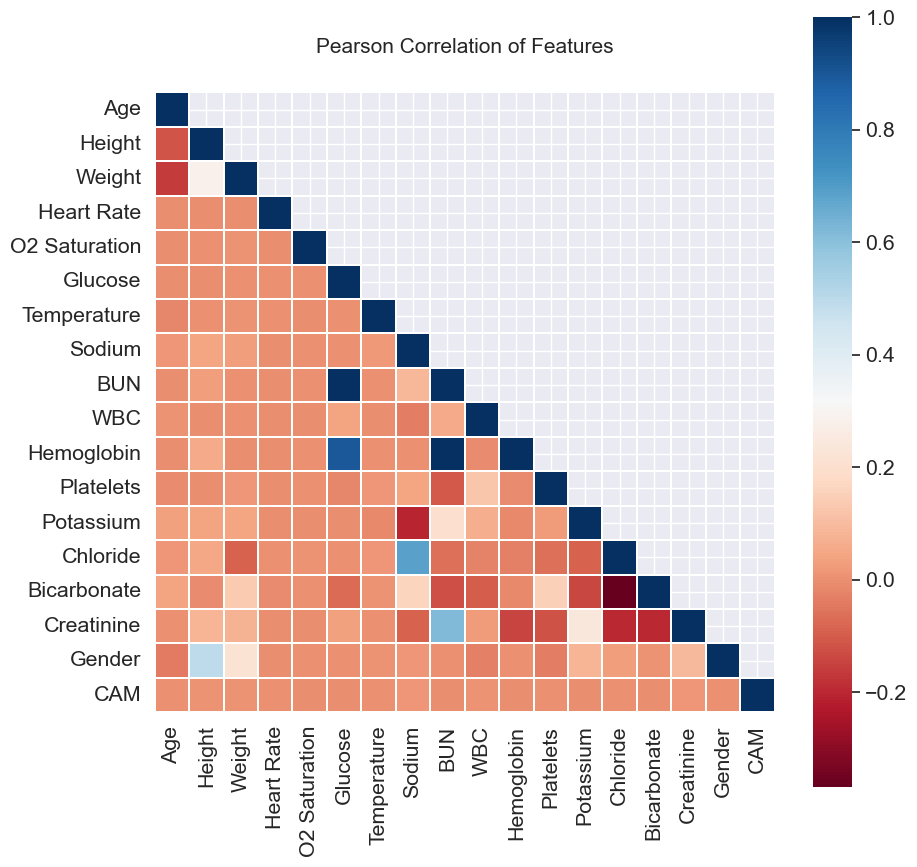

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu

mask = np.zeros(new_df[columns_for_corr].corr().shape, dtype=bool)
mask[np.tril_indices(len(mask))] = True
mask = ~mask

plt.figure(figsize=(10,10))

sns.set(font_scale=1.4)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(new_df[columns_for_corr].corr(), mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

plt.savefig('mimic_corr.png',dpi=450, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()

# Save not imputed data

In [208]:
# Load length of stay data
los = pd.read_csv(os.path.join(mimic_path, 'ICUSTAYS.csv'))
los = los[['ICUSTAY_ID','LOS']]
display(los.head())
los['LOS'] = los['LOS'] * 24
los.rename(columns={"ICUSTAY_ID": "patientunitstayid"},inplace=True)
print(f"number of data before merge: {new_df.patientunitstayid.nunique()}")
new_df_los = pd.merge(new_df, los, how='left', left_on=['patientunitstayid'],right_on=['patientunitstayid'])
print(f"number of data after merge: {new_df_los.patientunitstayid.nunique()}")

new_df_los = new_df_los[new_df_los['LOS']>=24] #CHANGE TO 48
new_df_los = new_df_los[new_df_los['itemoffset'] > 0] #CHANGE TO ZERO
new_df_los_nodups = new_df_los.drop_duplicates()

,ICUSTAY_ID,LOS
0,280836,3.2490
1,206613,3.2788
2,220345,2.8939
3,249196,2.0600
4,210407,1.6202


number of data before merge: 7292
number of data after merge: 7292


In [209]:
new_df_los_nodups.groupby("patientunitstayid").count().shape
display(new_df_los_nodups.head())
print("nan in label rec", new_df_los_nodups['labelrec'].isnull().sum())
print("nan in label pt", new_df_los_nodups['labelpt'].isnull().sum())

,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature,Sodium,BUN,WBC,direct bilirubin,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,ALT,AST,Alkaline Phosphate,CAM,labelrec,labelpt,LOS
1,200001,1,1,61,170.0,60.39,108.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
2,200001,2,1,61,170.0,60.39,110.0,98.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
3,200001,3,1,61,170.0,60.39,102.0,96.0,NaN,37.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
4,200001,4,1,61,170.0,60.39,108.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
5,200001,5,1,61,170.0,60.39,104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864


nan in label rec 0
nan in label pt 0


In [210]:
label_deli = new_df_los_nodups.copy()
label_deli['labelrec'] = np.nan
label_deli.loc[label_deli['CAM']==1,'labelrec']=1
label_deli.loc[label_deli['CAM']==0,'labelrec']=0
label_deli['labelpt'] = np.nan
pos_cam_coh = label_deli[label_deli['labelrec']==1]['patientunitstayid'].unique()
label_deli.loc[label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt']=1
label_deli.loc[~(label_deli['patientunitstayid'].isin(pos_cam_coh)), 'labelpt']=0
pos_cam_df = label_deli[label_deli['labelpt']==1]
neg_cam_df = label_deli[label_deli['labelpt']==0]
pos_cam_df.reset_index(inplace=True)
pos_cam_df = pos_cam_df.drop(columns=['index'])
neg_cam_df.reset_index(inplace=True)
neg_cam_df = neg_cam_df.drop(columns=['index'])

pos_cam_df.to_csv(os.path.join(data_path, 'pos_mimic_notimputed_24los.csv'), index=False)
neg_cam_df.to_csv(os.path.join(data_path, 'neg_mimic_notimputed_24los.csv'), index=False)

In [211]:
#read pos_cam_df and neg_cam_df
pos_cam_df = pd.read_csv(os.path.join(data_path, 'pos_mimic_notimputed_24los.csv'))
neg_cam_df = pd.read_csv(os.path.join(data_path, 'neg_mimic_notimputed_24los.csv'))

# CHECKPOINT 2

# Imputation 2

In [212]:
# # checkpoint
# checkpoint = label_deli.copy()
# # save checkpoint in data_path
# checkpoint.to_csv(os.path.join(data_path, 'checkpoint_2.csv'), index=False)
# #load
checkpoint = pd.read_csv(os.path.join(data_path, 'checkpoint_2.csv'))

In [213]:
new_df = label_deli.copy()
#put all col names into lowercase
new_df.columns = new_df.columns.str.lower()
display(new_df.head())

,patientunitstayid,itemoffset,gender,age,height,weight,heart rate,o2 saturation,glucose,temperature,sodium,bun,wbc,direct bilirubin,hemoglobin,platelets,potassium,chloride,bicarbonate,creatinine,alt,ast,alkaline phosphate,cam,labelrec,labelpt,los
1,200001,1,1,61,170.0,60.39,108.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
2,200001,2,1,61,170.0,60.39,110.0,98.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
3,200001,3,1,61,170.0,60.39,102.0,96.0,NaN,37.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
4,200001,4,1,61,170.0,60.39,108.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864
5,200001,5,1,61,170.0,60.39,104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,73.8864


In [214]:
# mean Imputation of each patient
mean_columns = ['age', 'height','weight']
for i in mean_columns:
    new_df[i] = new_df[i].fillna(new_df.groupby("patientunitstayid")[i].transform('mean'))

## Impute with mean of whole cohort
for i in mean_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mean())

In [215]:
# zero_columns = ['vent_flag', 'rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine',
#        'rate_phenylephrine']

In [216]:
# new_df[zero_columns] = new_df[zero_columns].fillna(value=0)

In [217]:
new_df.columns

Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
       'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
       'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
       'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
       'alkaline phosphate', 'cam', 'labelrec', 'labelpt', 'los'],
      dtype='object')

In [218]:
columns_order = ['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
                             'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
                             'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
                             'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
                             'alkaline phosphate', 'cam', 'labelrec', 'labelpt', 'los']


In [219]:
# PATIENT WISE
df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())
for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_24952\1852926287.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())


,column_name,percent_missing
0,patientunitstayid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,height,0.000000
5,weight,0.000000
6,los,0.000000
7,cam,0.000000
8,labelrec,0.000000
9,labelpt,0.000000


# FFill

In [220]:
new_df.columns

Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
       'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
       'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
       'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
       'alkaline phosphate', 'cam', 'labelrec', 'labelpt', 'los'],
      dtype='object')

In [221]:
#describe col temperature
new_df[columns_order].describe()

,patientunitstayid,itemoffset,gender,age,height,weight,heart rate,o2 saturation,glucose,temperature,sodium,bun,wbc,direct bilirubin,hemoglobin,platelets,potassium,chloride,bicarbonate,creatinine,alt,ast,alkaline phosphate,cam,labelrec,labelpt,los
count,598103.000000,598103.000000,598103.000000,598103.000000,598103.000000,598103.000000,587185.000000,5.737270e+05,156410.000000,169067.000000,48418.000000,72393.000000,37410.000000,898.000000,65488.000000,36042.000000,54918.000000,47890.000000,41253.000000,41209.000000,10131.000000,10122.000000,9899.000000,598103.000000,598103.000000,598103.000000,598103.000000
mean,249917.965611,122.369085,1.563831,63.757885,169.350688,82.537634,86.564572,1.096271e+02,154.180226,36.956266,138.681861,45.540002,12.064472,4.727951,25.349621,205.519325,4.088095,104.208364,24.989271,1.610836,256.057151,327.658714,132.353975,0.008657,0.008657,0.387779,245.878250
std,28864.767713,169.024216,0.495909,15.688588,11.300247,26.761947,17.780859,8.500170e+03,2827.329689,7.155672,5.535642,3716.611967,12.178997,5.783752,3907.638329,135.404843,0.635866,6.906299,5.305546,1.537853,900.420519,1241.174170,140.464245,0.092641,0.092641,0.487244,266.513618
min,200001.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-17.777778,97.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.800000,3.400000,5.000000,0.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,24.002400
25%,225097.000000,25.000000,1.000000,54.000000,168.000000,66.200000,74.000000,9.500000e+01,109.000000,36.500000,136.000000,14.000000,7.000000,1.000000,8.800000,111.000000,3.700000,100.000000,22.000000,0.700000,20.000000,30.000000,63.000000,0.000000,0.000000,0.000000,71.577600
50%,250180.000000,62.000000,2.000000,66.000000,169.350688,78.800000,85.000000,9.700000e+01,130.000000,36.888889,139.000000,24.000000,10.100000,2.700000,9.900000,179.000000,4.000000,104.000000,25.000000,1.100000,40.000000,57.000000,92.000000,0.000000,0.000000,0.000000,153.967200
75%,274671.000000,152.000000,2.000000,76.000000,173.000000,94.545000,98.000000,9.900000e+01,163.000000,37.388889,142.000000,41.000000,14.200000,5.900000,11.100000,267.000000,4.400000,108.000000,28.000000,1.900000,106.000000,135.000000,148.000000,0.000000,0.000000,1.000000,332.776800
max,299979.000000,2082.000000,2.000000,89.000000,445.000000,710.400000,950.000000,6.363333e+06,999999.000000,2686.305556,180.000000,999999.000000,950.000000,37.000000,999998.980000,1783.000000,26.500000,144.000000,50.000000,33.200000,25460.000000,34040.000000,2355.000000,1.000000,1.000000,1.000000,2084.361600


In [222]:
forward_columns = [col.lower() for col in [
       'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium', 'bun',
       'wbc', 'direct bilirubin', 'hemoglobin', 'platelets', 'potassium',
       'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast', 'alkaline phosphate'
       # 'sofa', 'sofa_wo_gcs', 'fluidin', 'fluidout'
]]

In [223]:
for i in forward_columns:
    new_df[i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.ffill())

In [224]:
# PATIENT WISE
df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_24952\1113354603.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())


,column_name,percent_missing
0,patientunitstayid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,height,0.000000
5,weight,0.000000
6,los,0.000000
7,cam,0.000000
8,labelrec,0.000000
9,labelpt,0.000000


# BFill

In [225]:
back_columns = forward_columns

In [226]:
for i in back_columns:
    new_df[i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.bfill())

In [227]:
#After Bfill
df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_24952\593391512.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())


,column_name,percent_missing
0,patientunitstayid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,height,0.000000
5,weight,0.000000
6,los,0.000000
7,cam,0.000000
8,labelrec,0.000000
9,labelpt,0.000000


# Drop columns with high missing rate (ALT,AST,Alk Ph, Dir Bil)


In [228]:
new_df.columns

Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
       'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
       'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
       'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
       'alkaline phosphate', 'cam', 'labelrec', 'labelpt', 'los'],
      dtype='object')

In [229]:
new_df.drop(
    columns=[
        'alt', 'ast', 'alkaline phosphate', 'direct bilirubin', 
        # 'fluidin', 'fluidout'
    ],
    inplace=True
)
print(new_df['patientunitstayid'].nunique())
print(new_df.shape)

6294
(598103, 23)


# Drop Patients with missing values

In [126]:
new_df.dropna(
       subset=[
              'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
              'bun', 'wbc', 'hemoglobin', 'platelets', 'potassium', 'chloride',
              'bicarbonate', 'creatinine'
       ],
       inplace=True
)

In [127]:
new_df.shape

(595051, 23)

In [ ]:
new_df.patientunitstayid.nunique())
print("nbr of unique patientunitstayid:", new_df.patientunitstayid.nunique())
print("nbr of patient with labelpt = 1:", new_df[new_df['labelpt']==1]['patientunitstayid'].nunique())
print("nbr of patient with labelpt = 0:", new_df[new_df['labelpt']==0]['patientunitstayid'].nunique())
print("nbr of patient with labelrec = 1:", new_df[new_df['labelrec']==1]['patientunitstayid'].nunique())
print("nbr of patient with labelrec = 0:", new_df[new_df['labelrec']==0]['patientunitstayid'].nunique())
print("nbr of patient with CAM = 1:", new_df[new_df['cam']==1]['patientunitstayid'].nunique())
print("nbr of patient with CAM = 0:", new_df[new_df['cam']==0]['patientunitstayid'].nunique())

nbr of unique patientunitstayid: 6294
nbr of patient with labelpt = 1: 1268
nbr of patient with labelpt = 0: 5026
nbr of patient with labelrec = 1: 1268
nbr of patient with labelrec = 0: 6294
nbr of patient with CAM = 1: 1268
nbr of patient with CAM = 0: 6294


In [233]:
#save final data
new_df.to_csv(os.path.join(path_csv, 'mimic_clean.csv'), index=False)